Zahra Hashemi - 97243072
<br>
Dorreen Rostami - 97243034

Simulation Project 1

In [45]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import collections

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<b>
خواسته 1:
<br>
نشان دهید احتمال اینکه در یک شبکه تصادفی ما دقیقا <code>m</code> لینک داشته باشیم برابر است با:

<br>
</font>
</p>

$ P = {n(n-1)/2 \choose m} * p^m * (1-p)^ {n(n-1)/2 - m} $
</b>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تحلیلی:
<br>
در یک گراف <code>n(n-1)/2</code> یال می‌توانیم داشته باشیم و اگر بخواهیم از این تعداد <code>m</code> تا یال را انتخاب می‌کنیم، <code>c(n(n-1)/2,m)</code> حالت برای این کار داریم
<br>
احتمال اینکه بین هر جفت گره یک یال باشد، <code>p</code> است. پس احتمال اتصال جفت گره ها به صورتی که <code>m</code> یال داشته باشیم، <code>
p^m </code>  است و احتمال اینکه بقیه جفت گره ها که تعدادشان<code> n(n-1)/2 - m </code> است بین‌شان یالی نباشد، <code>(n(n-1)/2 - m)^(1-p)</code> است
<br>
<br>
شبیه سازی (اضافی):
<br>
در هر iteration گرافی جدید با تعداد گره های مشخص و احتمال ایجاد یال مشخص تولید می‌کنیم و مشاهده میکنیم که نسبت تعداد گراف‌هایی که تعداد مشخصی یال (m تا یال) داشتند به کل گراف‌ها، به عدد به دست آمده از توزیع دوجمله‌ای صورت سوال همگرا میشود
</font>

</p>

0.1274229414560665


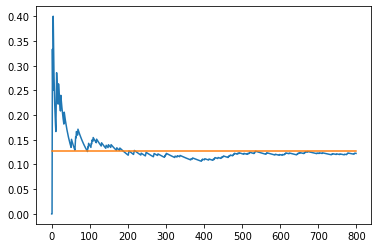

In [48]:
# 1.1

n = 12
p = 0.1
m = 8
prob = math.comb((n*(n-1)//2), m) * math.pow(p,m) * math.pow(1-p, (n*(n-1)/2)-m)
print(prob)
itr = 800
counter = []
counter_mean = []

for i in range(itr):
    counter.append(0)
    G = nx.erdos_renyi_graph(n, p, seed=None, directed=False)
    if nx.number_of_edges(G) == m:
        counter[i] = 1
    counter_mean.append(np.mean(counter))

plt.plot(range(itr), counter_mean)
plt.plot(range(itr), [prob for i in range(itr)])

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<b>
متوسط تعداد یال ها از توزیع دو جمله‌ای به شکلی تحلیلی به دست آورده و با متوسط تعداد یال ها از ساخت تعدادی شبکه تصادفی مقایسه کنید.
</b>
<br>
<br>
در هر iteration گرافی جدید با تعداد گره های مشخص و احتمال ایجاد یال مشخص تولید می‌کنیم و میانگین تعداد یال ها را از اولین گراف تولید شده تا الان محاسبه می‌کنیم. 
<br>
شبیه سازی را انقدر ادامه می‌دهیم که میانگین نسبتا ثابت می‌شود و به متوسط یال هایی که از توزیع دو جمله ای به دست آورده ایم، همگرا می‌شود.
<br>
</font>
</p>

$ \sum \limits _{m=0} ^{{n \choose 2}} m*p(m) = {n \choose 2} * p$ 


mean number of edges (binomial distribuition):  4.5
mean number of edges (at 900th simulation): 4.466666666666667


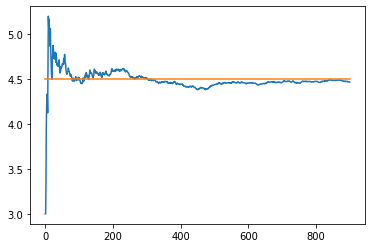

In [11]:
#1.2

n = 10
p = 0.1
itr = 900
edge_count = []
edge_mean = []
for i in range(itr):
    G = nx.erdos_renyi_graph(n, p, seed=None, directed=False)
    edge_count.append(nx.number_of_edges(G))
    edge_mean.append(np.mean(edge_count))

plt.plot(range(itr), edge_mean)
print("mean number of edges (binomial distribuition): ", math.comb(n,2)*p)
print("mean number of edges (at {}th simulation): {}".format(itr , edge_mean[itr-1]))
plt.plot(range(itr), [math.comb(n,2)*p for i in range(itr)])

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<b>
متوسط درجه و واریانس را محاسبه و با مقادیر حاصل از شبیه سازی مقایسه کنید.
</b>
<br>
<br>
در هر iteration گرافی جدید تولید می‌کنیم، سپس میانگین و واریانس درجه گره‌های این گراف را محاسبه می‌کنیم و در ادامه، میانگین میانگین و واریانس درجه گره های گراف های شبیه سازی شده تا اینجا را محاسبه میکنیم. 

<br>
مشاهده میکنیم که میانگین این دو مقدار به مقادیر تحلیلی زیر همگرا می‌شوند:
<br> 
</font>
</p>

$ mean-of-degrees = \sum \limits _{m=0} ^{{n \choose 2}} (2m/n)*p(m) =(n-1)*p$ 
<br>
$ variance-of-degrees = (n-1)*p*(1-p)$ 

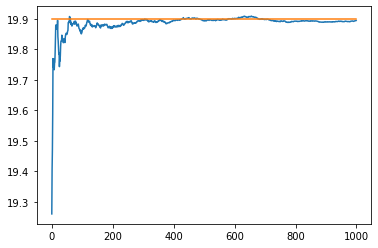

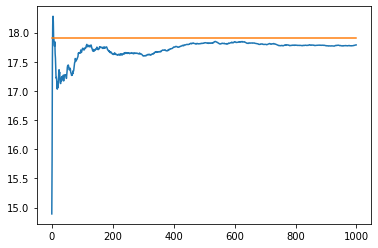

In [10]:
#1.3

n = 200
p = 0.1
itr = 1000
graph_degree_mean = []
graph_degree_var = []
degree_mean = []
degree_var = []

for i in range(itr):
    G = nx.erdos_renyi_graph(n, p)
    m = nx.number_of_edges(G)  # number of edges

    
    degrees = [deg for (node, deg) in G.degree()]
    graph_degree_var.append(np.var(degrees))  # variance of degrees
    graph_degree_mean.append(2 * m / n)       # mean of degrees
    degree_mean.append(np.mean(graph_degree_mean))
    degree_var.append(np.mean(graph_degree_var))

plt.figure(1)
plt.plot(range(itr), degree_mean)
plt.plot(range(itr), [(n-1)*p for i in range(itr)])
plt.figure(2)
plt.plot(range(itr), degree_var)
plt.plot(range(itr), [(n-1)*p*(1-p) for i in range(itr)])

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<b>
خواسته 2: 
<br>
نشان دهید که در حالت حدی و بهره‌گیری از قانون اعداد بزرگ توزیع درجه گرافهای تصادفی پوآسون و در حالت پیوسته از توزیع نرمال تبعیت خواهند کرد.
</b>
<br>
<br>
در یک گراف تصادفی، یک راس با احتمال p به راسی دیگر متصل است. پس احتمال اینکه راسی را انتخاب کنیم که به k راس متصل باشد و به n-1-k راس دیگر متصل نباشد برابر است با:
<br>
</p>

$ p^k*(1-p)^{n-1-k} $

<br>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
آن k راس را باید از بین n-1 راس دیگر انتخاب کنیم پس در نهایت خواهیم داشت:
</p>
<br>

$ {n-1 \choose k}*p^k*(1-p)^{n-1-k} $
</font>

<br>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
که رابطه فوق نشان می‌دهد که توزیع درجه گراف، از توزیع دو جمله‌ای تبعیت می‌کند.
<br>
<br>
در حالت حدی، تعداد راس های گراف به بی‌نهایت و احتمال به 0 میل میکند، همچنین امید ریاضی توزیع دوجمله‌ای به صورت زیر است:
<br>

$ \lambda = n*p $
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
و اگر به جای p در رابطه فوق جای‌گذاری کنیم:
<br>

$ p(k) ={n-1 \choose k}*(\lambda/n)^k*(1-\lambda/n)^{n-1-k} $
</font>
</p>
 

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اگر رابطه فوق را بازتر کنیم خواهیم داشت:
<br>

$ p(k) = \frac{(n-1)(n-2)...(n-k)(n-k-1)!}{(k!)(n-1-k)!} * {(\frac{\lambda}{n})}^k * (1-{\frac{\lambda}{n}})^{n-1-k} $
<br>

$ p(k) = \frac{(n-1)(n-2)...(n-k)}{k!} * {(\frac{\lambda}{n})}^k * (1-{\frac{\lambda}{n}})^{n-1-k} $
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

$ p(k) = \frac{(n-1)(n-2)...(n-k)}{n^{k}} * \frac{\lambda^k}{k!} * (1-{\frac{\lambda}{n}})^{n-1}*(1-{\frac{\lambda}{n}})^{-k} $
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال اگر n به بی‌نهایت میل کند:

<br>

$ \lim_{n \to \infty} p(k) = \frac{e^{-\lambda}\lambda^k}{k!} $
</font>
</p>
<br>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<b>
به شکل ریاضی تعبیر کنید که در توزیع پوآسون گره های زیادی وجود ندارند که درجه آن‌ها از میانگین بیشتر باشد.
</b>
<br>
<br>
با تقریب استرلینگ، <code>!n</code> را به صورت زیر می‌نویسیم:
<br>

$ A(n) = ({\frac{n}{e}})^n\sqrt{2\pi n} $
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال اگر در توزیع پوآسون، به جای <code> !k</code> تقریب استرلینگش را قرار دهیم، خواهیم داشت:
<br>

$ p(k) = \frac{(\frac{e}{k})^ke^{-<k>}{<k>}^k}{\sqrt{2\pi k}} $

$ p(k) = \frac{e^{k-<k>}({\frac{<k>}{k}})^k}{\sqrt{2\pi k}} $

</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اگر k را به بی‌نهایت میل دهیم:
<br>

$ \lim_{k \to \infty}  = \frac{e^{k-<k>}({\frac{<k>}{k}})^k}{\sqrt{2\pi k}} = \lim_{k \to \infty} \frac{e^{\infty-<k>}(\frac{<k>}{\infty})^\infty}{\infty} = 0 $
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
پس نشان دادیم که k هرچه بزرگتر می‌شود و به بی‌نهایت میل می‌کند، احتمال مشاهده گره های هاب با مرتبه نمایی کمتر شده و به صفر میل می‌کند.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<br>
<b>
با دادن مقادیر مختلف به p از کوچک به بزرگ نمودار توزیع درجه را رسم کنید و پدیده چولگی را در توزیع درجه گره‌های گرافهای تصادفی بررسی کنید
</b>
<br>
با مشاهده نمودارهای حاصل از شبیه سازی میتوان دید که با افزایش p چولگی راست رفته رفته تبدیل به چولگی چپ میشود
</font>
</p>

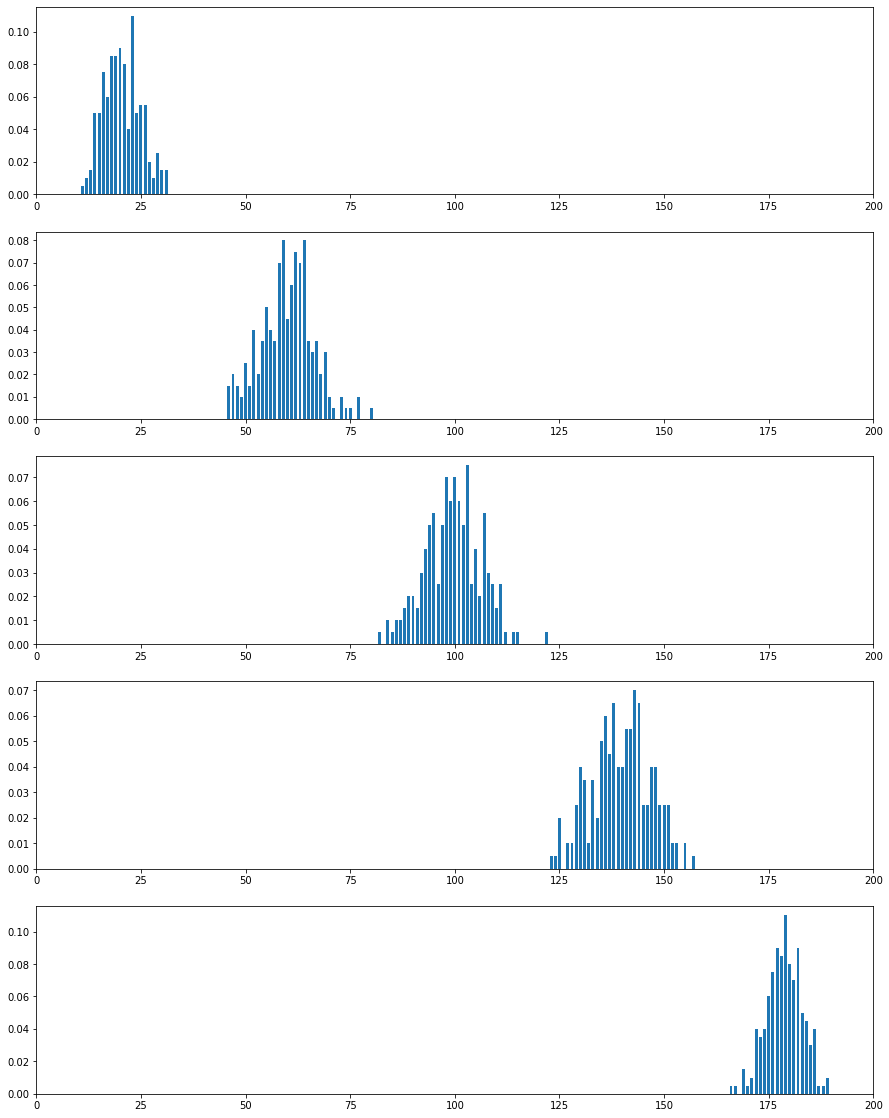

In [44]:
#2
n = 200
p = [0.1, 0.3, 0.5, 0.7, 0.9]
fig = plt.figure(figsize=(15,20))
for i in range(5):
    G = nx.erdos_renyi_graph(n, p[i])

    degree_in_graph = sorted([d for n, d in G.degree()])
    degree_count = collections.Counter(degree_in_graph) 
    degree, count = zip(*degree_count.items())    
    p_k = [c/n for c in count]
    ax1 = fig.add_subplot(5, 1, i+1)
    plt.bar(degree, p_k, width=0.7)
    ax1.set_xlim([0, n]) #since the highest possible degree is n-1

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<b>
خواسته 3:
<br>
 نشان دهید در يك احتمال 
مشخص مانند Pc ~ logn/n به طور ناگهاني با تغيير فاز در احتمال همبندي مواجه خواهيم بود
</font>
</b>
</p>


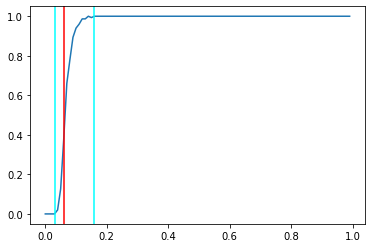

In [12]:
#3

n = 70
itr = 150

prob = []
for p in np.arange(0,1,0.01):
    n_connected_graphs = 0
    for i in range(itr):
        G = nx.erdos_renyi_graph(n, p)
        n_connected_graphs += int(nx.is_connected(G))
    prob.append(n_connected_graphs / itr)

prob1, prob2 = 0, 0

for i in range(len(prob)):
    if prob[i] == 0 and prob[i+1] != 0:
        prob1 = i/100
    if prob[i] == 1 and prob[i-1] != 1:
        prob2 = i/100

plt.plot(np.arange(0,1,0.01), prob)
plt.axvline(x=math.log(n)/n, color='red') #Pc
plt.axvline(x=prob1, color='cyan') #start of phase trans
plt.axvline(x=prob2, color='cyan') #end of phase trans


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<b>
خواسته 4:
<br>
بررسی حالت نهایی شبکه با در نظر گرفتن فیتنس گره‌ها برای توزیع یال‌ها
<br>
<br>
</b>
مشاهده میشود شبکه به سمت تعادل شدن (از نظر گرمی/سردی گره‌ها) متمایل میشود.
</font>
</p>

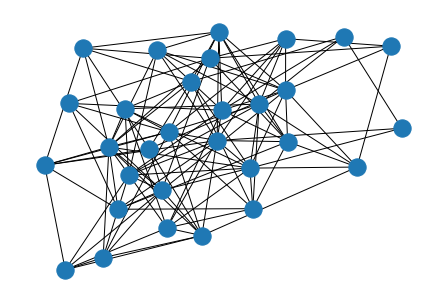

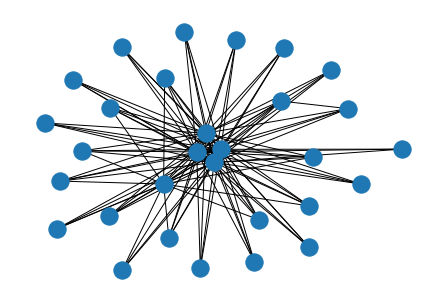

In [40]:
#4.1

def calc_prob(G, u):
    u_neigh = list(G.neighbors(u))
    all_nodes = list(G.nodes())
    u_not_neigh = [i for i in all_nodes + u_neigh if i not in u_neigh and i != u]

    degs = [d for n, d in G.degree()]
    mean = np.mean(degs)
    std = np.std(degs)
    probs = {}
    for v in u_not_neigh:
        deg_v = G.degree[v]
        probs[v] = (1/(std*math.sqrt(2*math.pi)))*np.exp(-(1/2) * ((deg_v - mean) / std) ** 2)

    return list(probs.keys()),list(probs.values())

n = 30
p = 0.3
itr = n ** 2 + 20000

G = nx.erdos_renyi_graph(n, p)
plt.figure(1)
nx.draw(G)
plt.figure(2)
for it in range(itr):
    u,v = random.choice(list(G.edges()))

    u_not_neigh,probs = calc_prob(G, u)
    if len(u_not_neigh) == 0:
        continue
    w = random.choices(population=u_not_neigh, weights=probs, k=1)[0]
    G.remove_edge(u,v)
    G.add_edge(u,w)
nx.draw(G)


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<b>
#4.2
<br>
قضیه:
<br>
تعداد راه‌هایی که میتوان m شی نامتمایز را بین n ظرف مختلف توزیع کرد طوری که هیچ ظرفی کمتر از p شی و بیشتر از p+q-1 شی نداشته باشد، ضریب x^(m-pn) در بسط چند جمله‌ای:
<br>

$ (1-x^q)^n(1-x)^{-n} = (1+x+x^2+...+x^{q-1})^n $
<br>
</b>
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<b>
و عبارت است از:
<br>

$ \sum \limits _{l=0} ^{n} (-1)^n{n \choose l}{m-np-lq+n-1 \choose n-l} $ 
</b>
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
باید جواب مسئله زیر را محاسبه کنیم:
<br>

$ x_1 + x_2 + ... + x_n = m , p \le x_i \le p+q-1 $
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<br>
اگر به همه p تا اختصاص دهیم:

<br>

$ y_i = x_i + p $
<br>

$ y_1 + y_2 + ... + y_n = m-np , y_i \le q-1 $
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<br>
که با دانش گسسته میدانیم جواب مسئله فوق ضریب x^(m-pn) در چندجمله‌ای زیر است:
<br>

$ (1+x+x^2+...+x^{q-1})^n = (1-x^q)^n(1-x)^{-n}$
<br>
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<br>
پ.ن: برای ضرایب جملات بسط دوجمله‌ای با توان منفی:
<br>

https://brilliant.org/wiki/negative-binomial-theorem/
<br>
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<br>
پس داریم:
<br>

$ (1-x^q)^n = \sum \limits _{l=0}^{n} {n \choose l}(-x^q)^l = \sum \limits _{l=0}^{n} (-1)^l{n \choose l}x^{ql} $
<br>

$ (1-x)^{-n} = \sum \limits _{k=0}^{\inf} {n+k-1 \choose k}(-1)^k(-x)^k = \sum \limits _{k=0}^{\infty} {n+k-1 \choose k}x^k = \sum \limits _{k=0}^{\infty} {n+k-1 \choose n-1}x^k$
<br>
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال میخواهیم توان x برابر m-np شود
<br>

$ x^{ql} * x^k = x^{m-np} $
<br>

$ k = m - np - ql $
<br>

$ \sum \limits _{k=0}^{\infty} {n+k-1 \choose n-1}x^k = {n+m-np-ql-1 \choose n-1}x^{m - np - ql} $

<br>

$ (1-x^q)^n(1-x)^{-n} = \sum \limits _{l=0}^{n} (-1)^l{n \choose l}x^{ql} * \sum \limits _{k=0}^{\infty} {n+k-1 \choose n-1}x^k = \sum \limits _{l=0}^{n} (-1)^l{n \choose l}x^{ql} * {n+m-np-ql-1 \choose n-1}x^{m - np - ql} = \sum \limits _{l=0}^{n} (-1)^l{n \choose l}{n+m-np-ql-1 \choose n-1}x^{m - np} $
</font>
</p>
